In [6]:
from IPython.display import Image
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [7]:
results={
    0:'cat',
    1:'dog'
}
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [8]:
model = tensorflow.keras.models.load_model("../model/export/Servo/1/")

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [10]:
def infer(file):
    from PIL import Image

    im=Image.open(img_file)
    im=im.resize(Image_Size)
    im=np.expand_dims(im,axis=0)
    im=np.array(im)
    im=im/255

    pred=model.predict([im])[0]
    return (results[np.argmax(pred)])

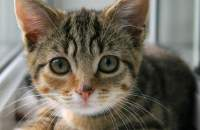

In [11]:
img_file="../images/image1.jpg"
Image(img_file) 

In [12]:
infer(img_file)

'cat'

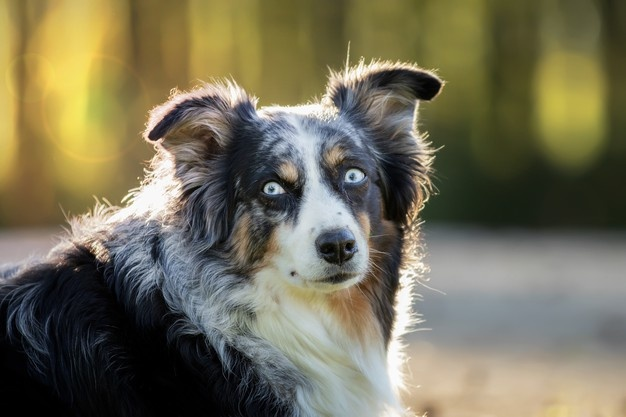

In [13]:
img_file="../images/image2.jpg"
Image(img_file) 

In [14]:
infer(img_file)

'dog'